In [10]:
import cv2
import numpy as np
import copy

cv2.namedWindow('mask')

def nothing(x):
    pass

cv2.createTrackbar('lh', 'mask', 4, 255, nothing)
cv2.createTrackbar('ls', 'mask', 15, 255, nothing)
cv2.createTrackbar('lv', 'mask', 86, 255, nothing)
cv2.createTrackbar('hh', 'mask', 22, 255, nothing)
cv2.createTrackbar('hs', 'mask', 80, 255, nothing)
cv2.createTrackbar('hv', 'mask', 189, 255, nothing)

img_orig = cv2.imread('objects.jpg')
w, h, _ = img_orig.shape

while (True):
    frame = cv2.resize(img_orig, (h // 2, w // 2))
    
    print(frame.shape)
    
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    lh = cv2.getTrackbarPos('lh', 'mask')
    ls = cv2.getTrackbarPos('ls', 'mask')
    lv = cv2.getTrackbarPos('lv', 'mask')
    hh = cv2.getTrackbarPos('hh', 'mask')
    hs = cv2.getTrackbarPos('hs', 'mask')
    hv = cv2.getTrackbarPos('hv', 'mask')
    
    mask = cv2.inRange(hsv, (lh, ls, lv), (hh, hs, hv))
    
    mask = 255 - mask
    
    kernel = np.ones((3, 3), np.uint8)
    morph = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    
    #cv2.imshow('mask', mask)
    #cv2.imshow('morph', morph)
    
    connectivity = 4 
    output = cv2.connectedComponentsWithStats(morph, connectivity, cv2.CV_32S)

    num_labels = output[0]

    labels = output[1]

    stats = output[2]
    
    filtered = np.zeros_like(morph)
    
    for i in range(1, num_labels):
        a = stats[i, cv2.CC_STAT_AREA]
        top = stats[i, cv2.CC_STAT_TOP]
        left = stats[i, cv2.CC_STAT_LEFT]
        width = stats[i, cv2.CC_STAT_WIDTH]
        height = stats[i, cv2.CC_STAT_HEIGHT]
        
        if (a >= 500):
            filtered[np.where(labels == i)] = 255
            #print(a) 
            
            cv2.putText(frame, str(a / (width * height))[:4], (left, top), cv2.FONT_ITALIC, 1, (0, 0, 255), 2, cv2.LINE_4)
            cv2.rectangle(frame, (left, top), (left + width, top + height), (0, 255, 0), 1)
    
    cv2.imshow('frame', frame)
    cv2.imshow('mask_filtered', filtered)
    
    key = cv2.waitKey(80) & 0xFF
    
    if (key == ord('q')):
        break

cv2.destroyAllWindows()
cv2.waitKey(10)

(764, 1239, 3)
(764, 1239, 3)
(764, 1239, 3)
(764, 1239, 3)
(764, 1239, 3)
(764, 1239, 3)
(764, 1239, 3)
(764, 1239, 3)
(764, 1239, 3)
(764, 1239, 3)
(764, 1239, 3)
(764, 1239, 3)
(764, 1239, 3)
(764, 1239, 3)
(764, 1239, 3)
(764, 1239, 3)
(764, 1239, 3)
(764, 1239, 3)
(764, 1239, 3)
(764, 1239, 3)
(764, 1239, 3)
(764, 1239, 3)
(764, 1239, 3)
(764, 1239, 3)
(764, 1239, 3)
(764, 1239, 3)
(764, 1239, 3)
(764, 1239, 3)
(764, 1239, 3)
(764, 1239, 3)
(764, 1239, 3)
(764, 1239, 3)
(764, 1239, 3)
(764, 1239, 3)
(764, 1239, 3)
(764, 1239, 3)
(764, 1239, 3)
(764, 1239, 3)
(764, 1239, 3)
(764, 1239, 3)
(764, 1239, 3)
(764, 1239, 3)
(764, 1239, 3)
(764, 1239, 3)
(764, 1239, 3)
(764, 1239, 3)
(764, 1239, 3)
(764, 1239, 3)
(764, 1239, 3)
(764, 1239, 3)
(764, 1239, 3)
(764, 1239, 3)
(764, 1239, 3)
(764, 1239, 3)
(764, 1239, 3)
(764, 1239, 3)
(764, 1239, 3)
(764, 1239, 3)
(764, 1239, 3)
(764, 1239, 3)
(764, 1239, 3)
(764, 1239, 3)
(764, 1239, 3)
(764, 1239, 3)
(764, 1239, 3)
(764, 1239, 3)
(764, 1239

-1

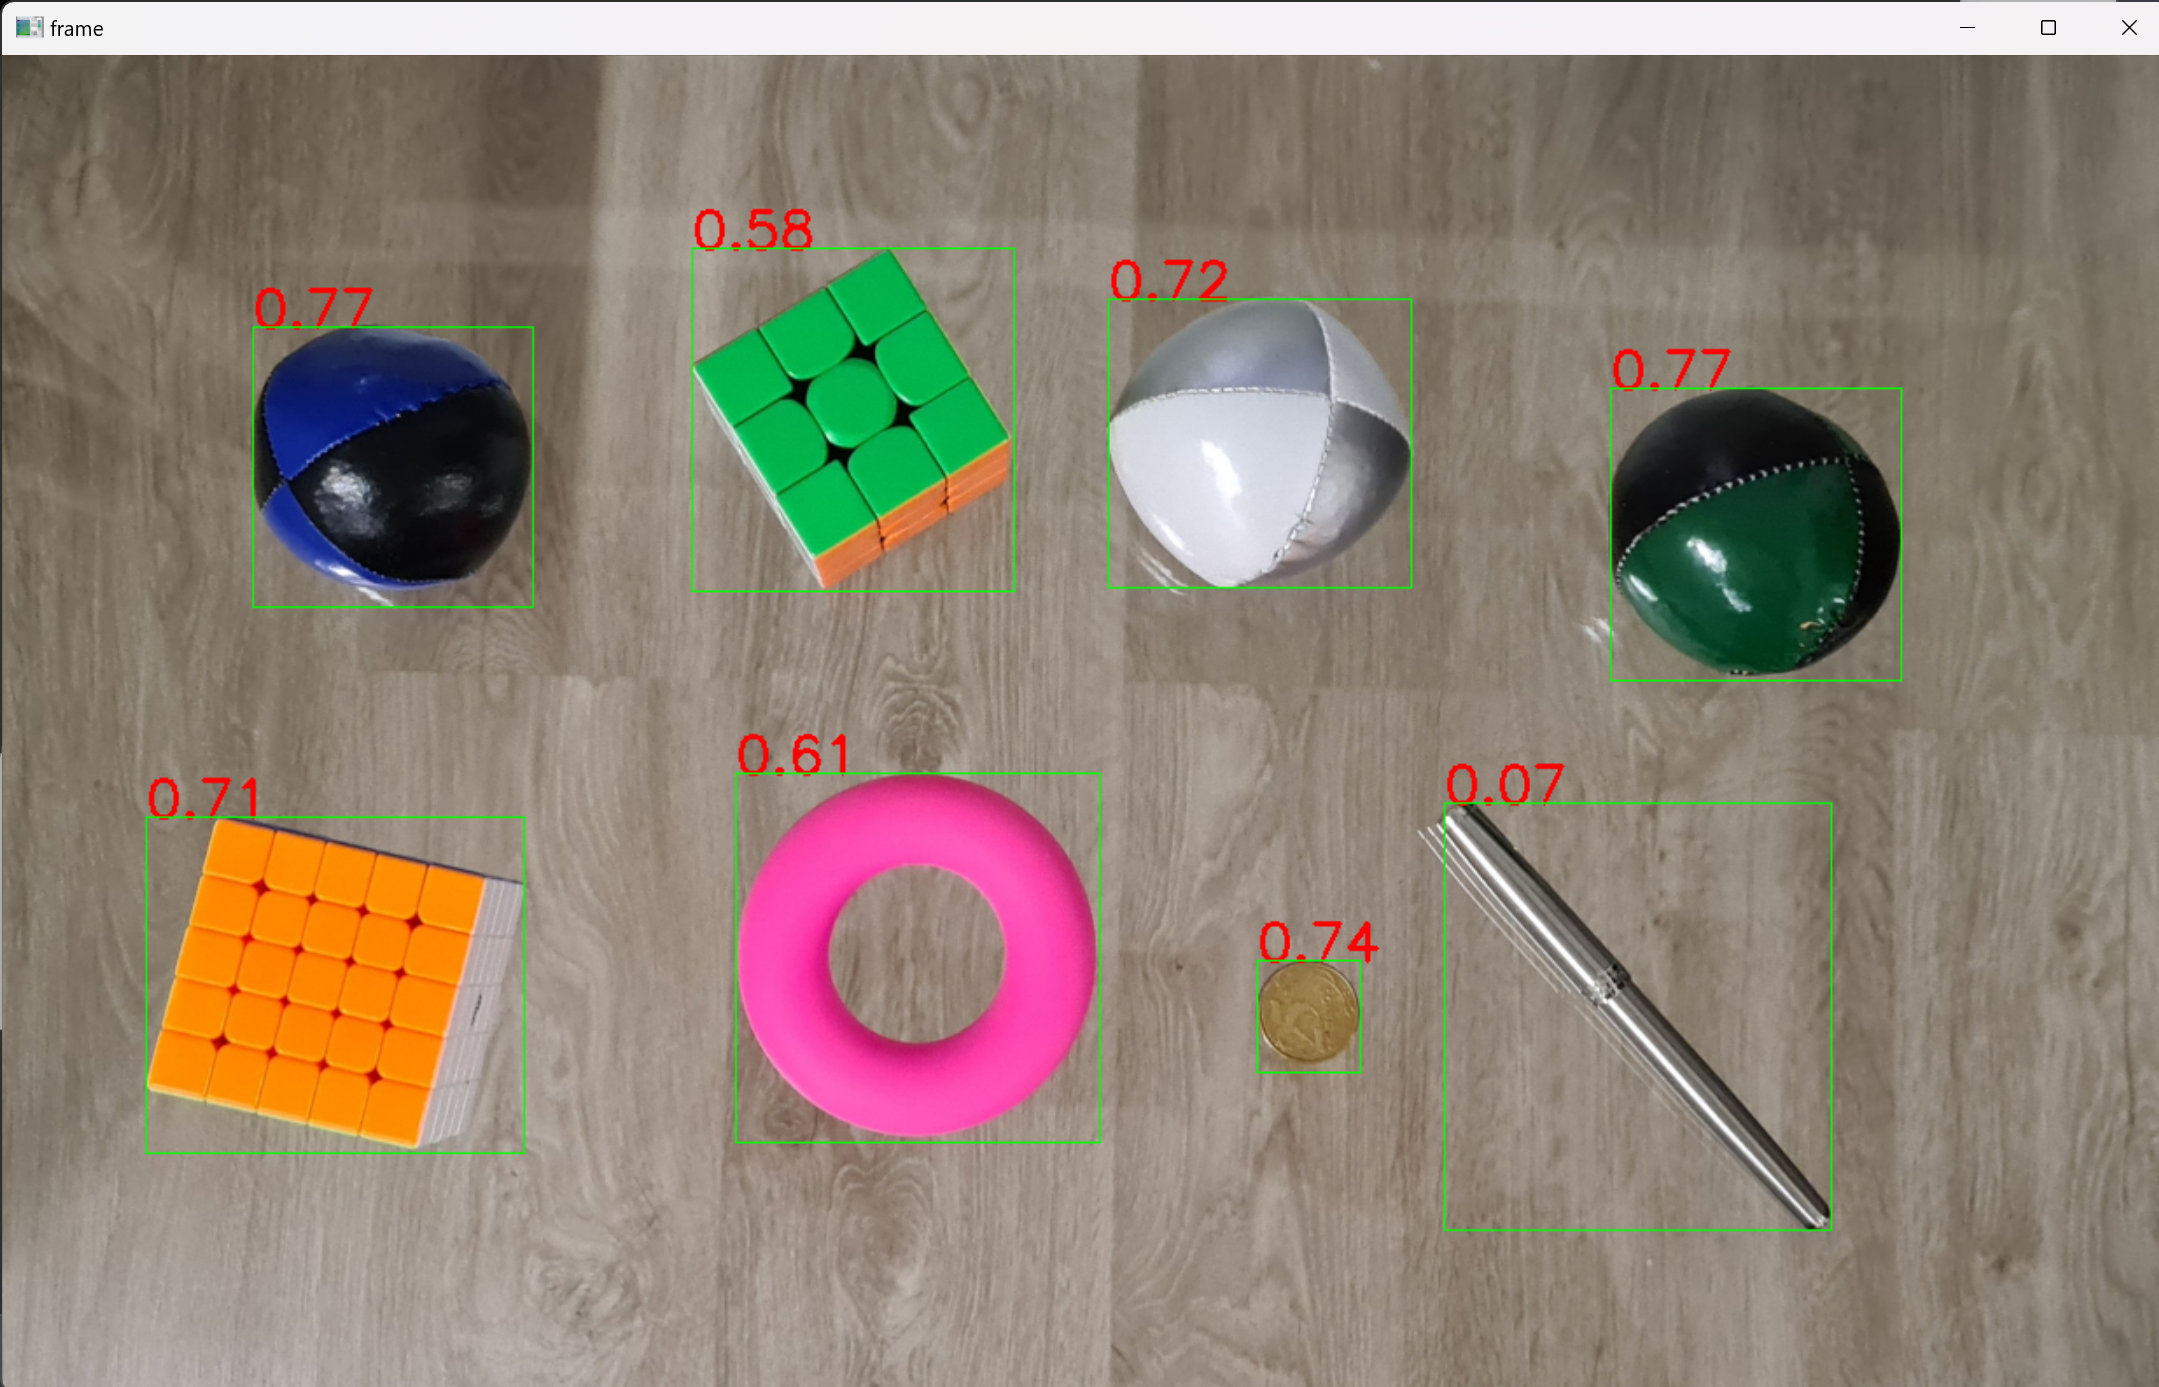

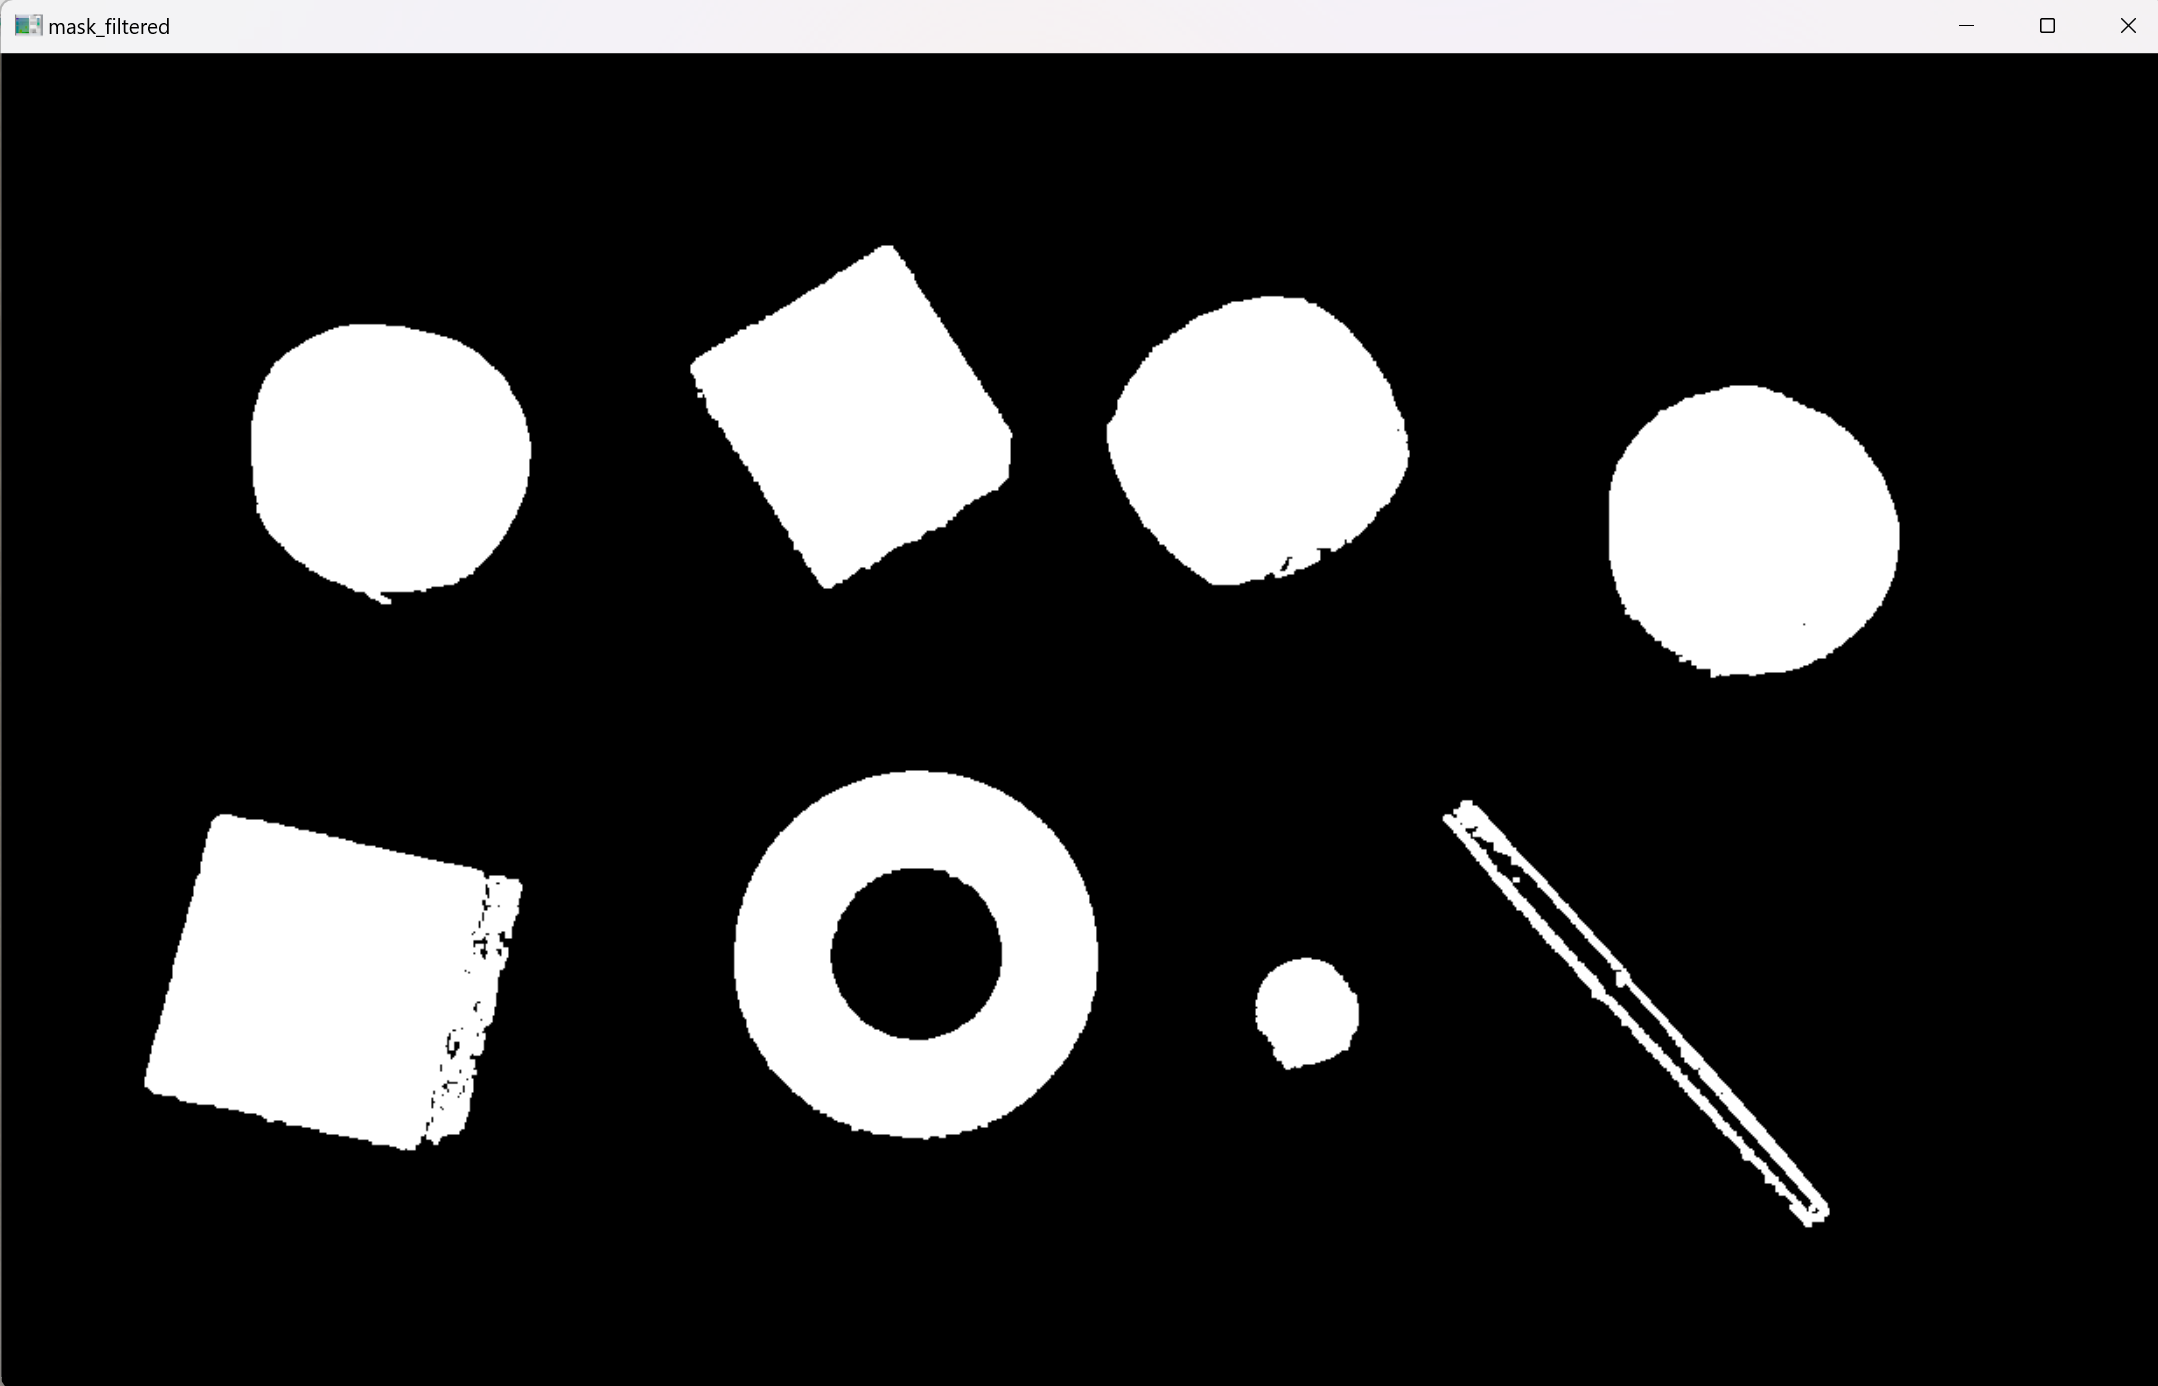

Выше показан результат детекции и маска после морфлогогических преобразований и анализа связных компонент (над инвертированной входной маской)